In [99]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
train_data.shape, train_targets.shape, test_data.shape, test_targets.shape

((404, 13), (404,), (102, 13), (102,))

In [100]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [101]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1),
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [102]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[:(i+1) * num_val_samples]],
                                         axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                         train_targets[:(i+1) * num_val_samples]],
                                         axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    histories.append(history.history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [103]:
average_histories = {}

for i in range(num_epochs):
    for key in histories[fold].keys():
        if key not in average_histories:
            average_histories[key] = []
        average_histories[key].append(np.mean([histories[fold][key][i] for fold in range(k)]))


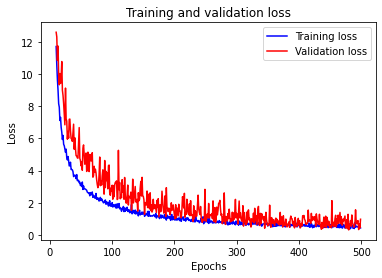

In [104]:
import matplotlib.pyplot as plt
begin = 10
history_dict = history.history
loss_values = average_histories["loss"][begin:]
val_loss_values = average_histories["val_loss"][begin:]
epochs = range(begin,len(loss_values)+begin)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [105]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=200, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score, test_mae_score)

4/4 [==============================] - 0s 948us/step - loss: 12.5763 - mae: 2.4505
12.576326370239258 2.450482130050659
